First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbp

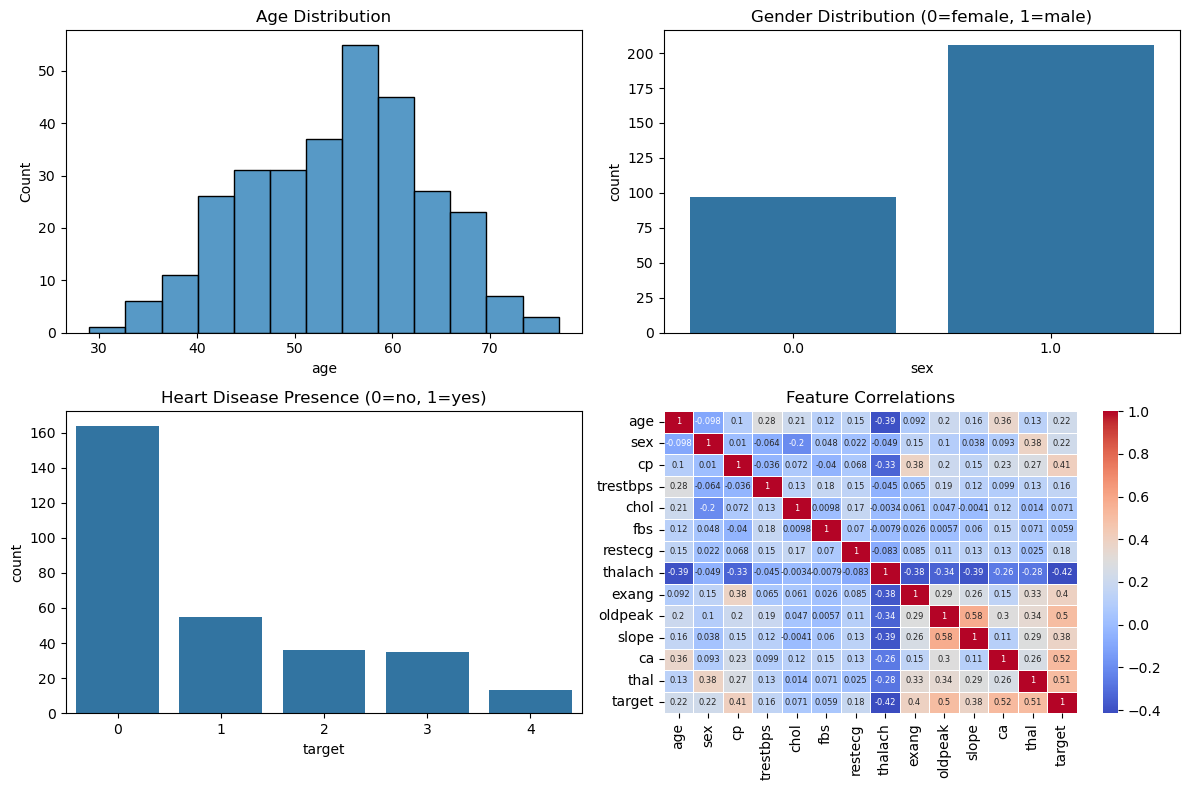

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv('data/heart_disease.csv', names=columns)

# View first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check data info
print("\nDataset information:")
print(data.info())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Create visualizations
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['age'].dropna())
plt.title('Age Distribution')

# Gender counts
plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=data.dropna(subset=['sex']))
plt.title('Gender Distribution (0=female, 1=male)')

# Target distribution
plt.subplot(2, 2, 3)
sns.countplot(x='target', data=data.dropna(subset=['target']))
plt.title('Heart Disease Presence (0=no, 1=yes)')

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 6})
plt.title('Feature Correlations')

plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()